<a href="https://colab.research.google.com/github/Soham1306/DLAssignments/blob/main/gates_impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-61b55fbf5408>:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


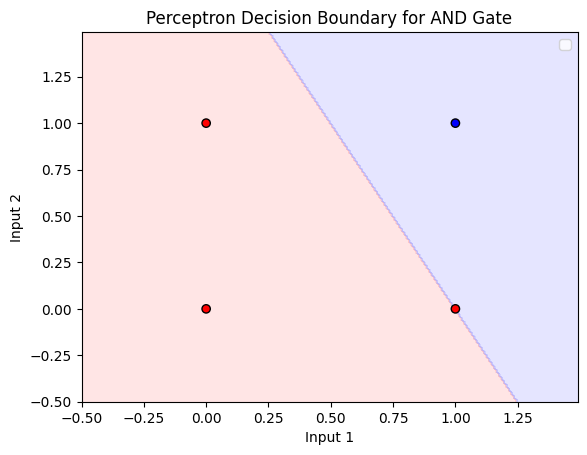

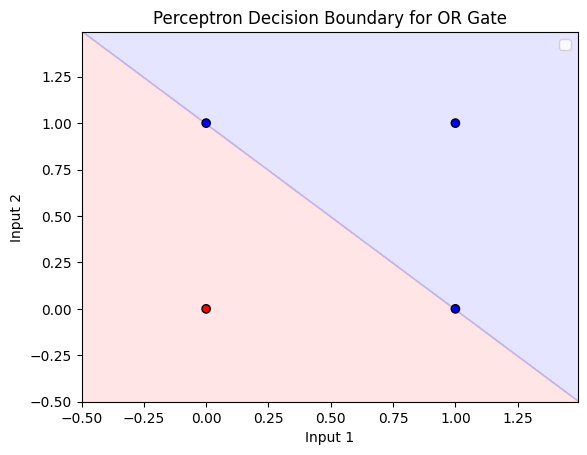

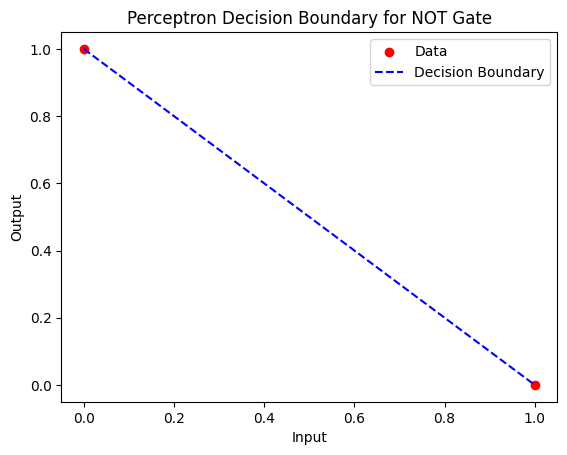

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class PerceptronModel:
    def __init__(self, learning_rate=0.1, max_iter=500):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.max_iter):
            for i in range(X.shape[0]):
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if z >= 0 else 0
                update = self.learning_rate * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        return np.array([1 if np.dot(x, self.weights) + self.bias >= 0 else 0 for x in X])

def plot_decision_boundary(X, y, model, title):
    if X.shape[1] == 1:
        plt.scatter(X, y, color='red', marker='o', label='Data')
        plt.plot(X, model.predict(X), color='blue', linestyle='--', label='Decision Boundary')
        plt.xlabel("Input")
        plt.ylabel("Output")
    else:
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k')
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
    plt.title(title)
    plt.legend()
    plt.show()

# Define the logic gate inputs and outputs
logic_gates = {
    "AND": {"X": np.array([[0,0], [0,1], [1,0], [1,1]]), "y": np.array([0, 0, 0, 1])},
    "OR": {"X": np.array([[0,0], [0,1], [1,0], [1,1]]), "y": np.array([0, 1, 1, 1])},
    "NOT": {"X": np.array([[0], [1]]), "y": np.array([1, 0])}  # NOT gate is single-input
}

# Train and plot decision boundaries for AND, OR, and NOT gates
for gate, data in logic_gates.items():
    perceptron = PerceptronModel(learning_rate=0.1, max_iter=500)
    perceptron.fit(data["X"], data["y"])
    plot_decision_boundary(data["X"], data["y"], perceptron, f"Perceptron Decision Boundary for {gate} Gate")